In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve,KFold
from sklearn.metrics import make_scorer, classification_report,average_precision_score, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, f1_score, roc_auc_score

In [2]:
data_train = pd.read_csv("train.csv",sep = ';')
df = data_train.copy(deep=True)
data_data = pd.read_csv("train.csv",sep = ';')
test_ds = pd.read_csv("test.csv",sep = ';')
ds_test = pd.read_csv("test.csv",sep = ';')
data_test = pd.read_csv("test.csv",sep = ';')

In [3]:
#looking at the data (test and train)
print(data_train)
print(test_ds)


       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [4]:
print(data_train. isnull(). sum())
print(test_ds. isnull(). sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [6]:
print(data_train.describe())
print(test_ds.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [7]:
data_train.info()
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 co

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>]],
      dtype=object)

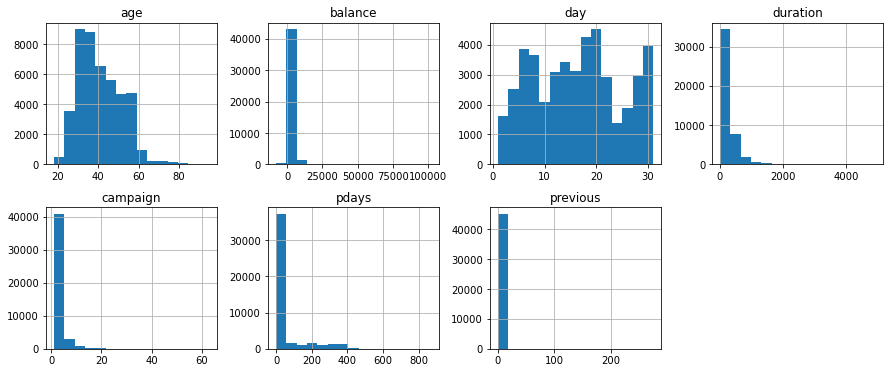

In [8]:
#visualising numerical data distribution
data_train[['age','balance','day','duration','campaign','pdays','previous']].hist(bins=15, figsize=(15, 6), layout=(2, 4))

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>]],
      dtype=object)

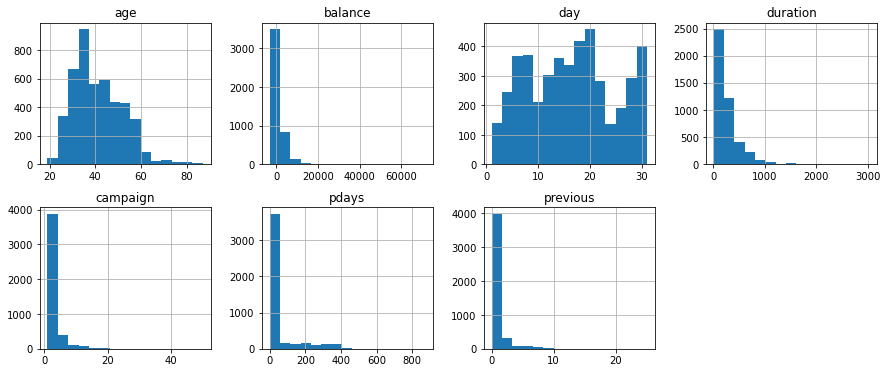

In [9]:
test_ds[['age','balance','day','duration','campaign','pdays','previous']].hist(bins=15, figsize=(15, 6), layout=(2, 4))

pre-processing for eda

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

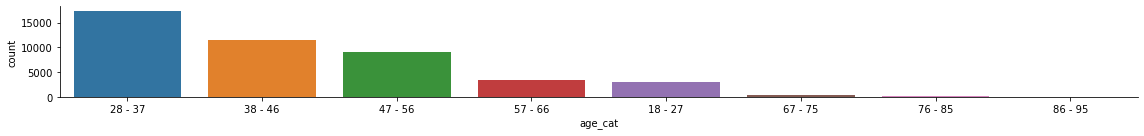

Information about job
blue-collar      21.53
management       20.92
technician       16.80
admin.           11.44
services          9.19
retired           5.01
self-employed     3.49
entrepreneur      3.29
unemployed        2.88
housemaid         2.74
student           2.07
unknown           0.64
Name: job, dtype: float64


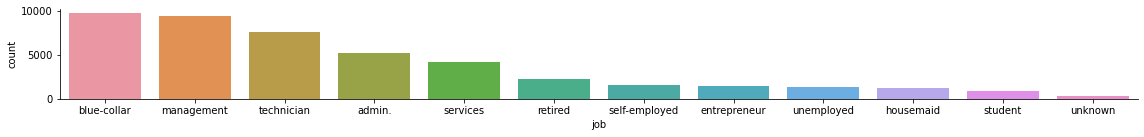

Information about marital
married     60.19
single      28.29
divorced    11.52
Name: marital, dtype: float64


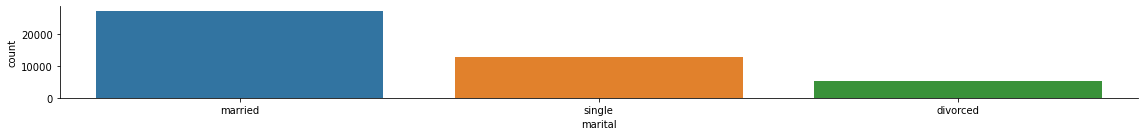

Information about education
secondary    51.32
tertiary     29.42
primary      15.15
unknown       4.11
Name: education, dtype: float64


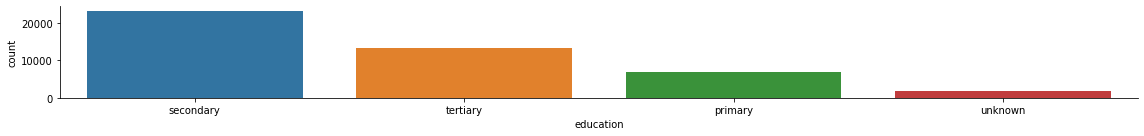

Information about default
no     98.2
yes     1.8
Name: default, dtype: float64


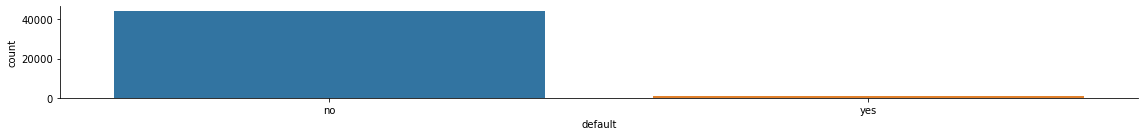

Information about balance_cat
500 - 1000               15.29
250 - 500                13.73
0 - 100                  11.49
100 - 250                11.02
-100 -0                  10.00
2500 - 5000               8.91
1500 - 2500               8.89
1000 - 1500               8.26
-500 <balance<-100        4.56
5000 - 10000              4.46
10000 - 20000             1.41
-1000 <balance<-500       1.22
20000 - 50000             0.39
-2500 <balance<-1000      0.30
50000 - 110000            0.04
-5000 <balance<-2500      0.02
-10000 <balance<-5000     0.00
Name: balance_cat, dtype: float64


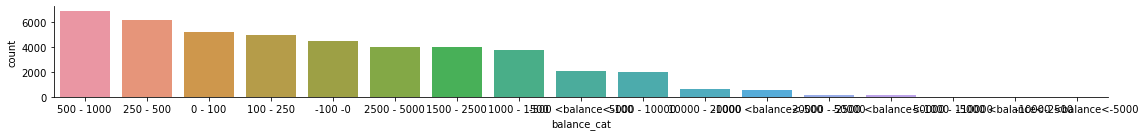

Information about housing
yes    55.58
no     44.42
Name: housing, dtype: float64


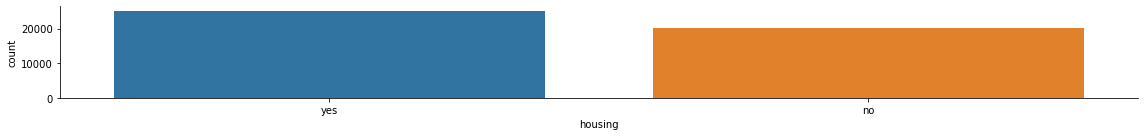

Information about loan
no     83.98
yes    16.02
Name: loan, dtype: float64


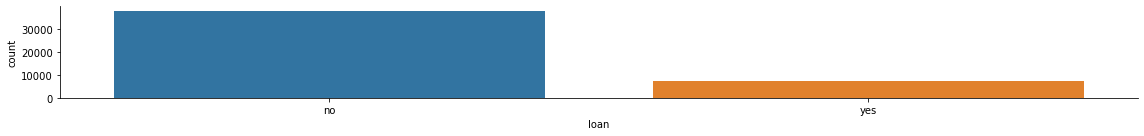

Information about contact
cellular     64.77
unknown      28.80
telephone     6.43
Name: contact, dtype: float64


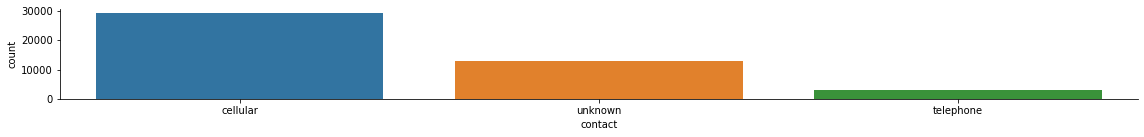

Information about day_cat
20    6.09
18    5.10
21    4.48
17    4.29
6     4.27
5     4.22
14    4.09
8     4.07
28    4.05
7     4.02
19    3.89
29    3.86
15    3.77
12    3.55
13    3.51
30    3.46
9     3.45
11    3.27
4     3.20
16    3.13
2     2.86
27    2.48
3     2.39
26    2.29
23    2.08
22    2.00
25    1.86
31    1.42
10    1.16
24    0.99
1     0.71
Name: day_cat, dtype: float64


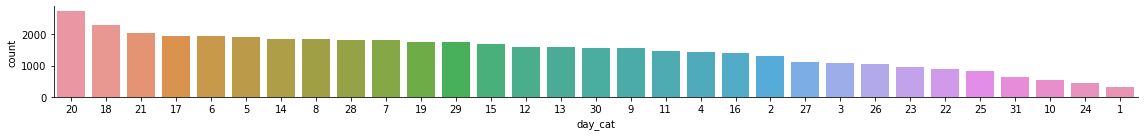

Information about month
may    30.45
jul    15.25
aug    13.82
jun    11.81
nov     8.78
apr     6.49
feb     5.86
jan     3.10
oct     1.63
sep     1.28
mar     1.06
dec     0.47
Name: month, dtype: float64


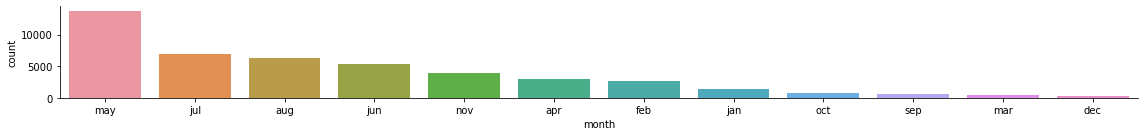

Information about duration_cat
1 min-2min      20.52
2 min-3min      19.06
5 min-10min     18.77
3 min-4min      13.35
4 min-5min       9.39
30s-1min         6.10
10 min-15min     5.25
0 s <30s         4.44
15 min-30min     2.90
30 min-60min     0.23
60 min-90min     0.01
Name: duration_cat, dtype: float64


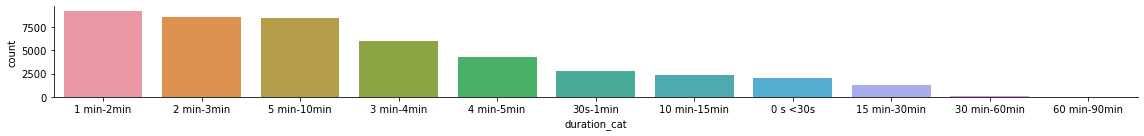

Information about campaign_cat
1          38.80
2          27.66
3          12.21
4           7.79
5           3.90
6           2.86
7           1.63
10 - 15     1.47
8           1.19
9           0.72
15 - 20     0.63
10          0.59
20 - 25     0.27
25 - 30     0.14
30 - 35     0.08
35 - 40     0.02
40 - 50     0.02
50 - 65     0.01
Name: campaign_cat, dtype: float64


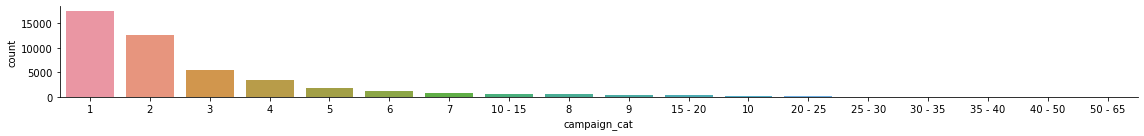

Information about pdays_cat
npc          81.74
150 - 200     4.33
300 - 350     2.67
50 - 100      2.61
350 - 400     2.27
250 - 300     2.19
100 - 150     2.01
200 - 250     1.09
0 - 50        0.57
450 - 500     0.14
400 - 450     0.14
650 - 880     0.10
500 - 550     0.07
550 - 650     0.06
Name: pdays_cat, dtype: float64


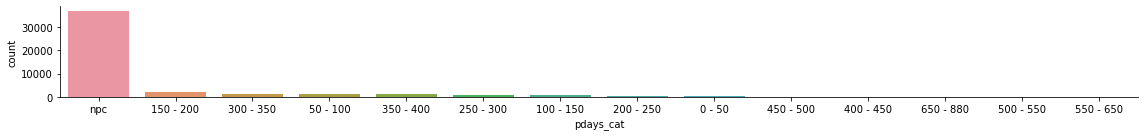

Information about previous_cat
0          81.75
1           6.13
2           4.66
3           2.53
4           1.58
5           1.02
6           0.61
7           0.45
10 - 15     0.41
8           0.29
9           0.20
10          0.15
15 - 20     0.12
20 - 25     0.06
25 - 30     0.04
35 - 40     0.01
30 - 35     0.00
Name: previous_cat, dtype: float64


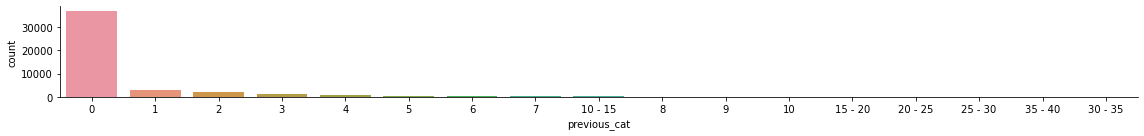

Information about poutcome
unknown    81.75
failure    10.84
other       4.07
success     3.34
Name: poutcome, dtype: float64


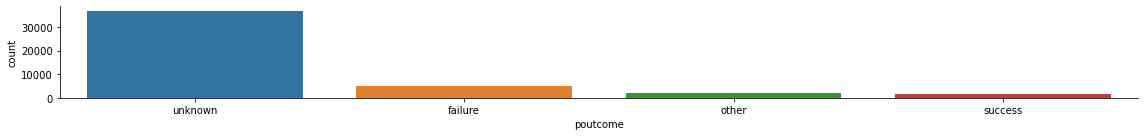

Information about y
no     88.3
yes    11.7
Name: y, dtype: float64


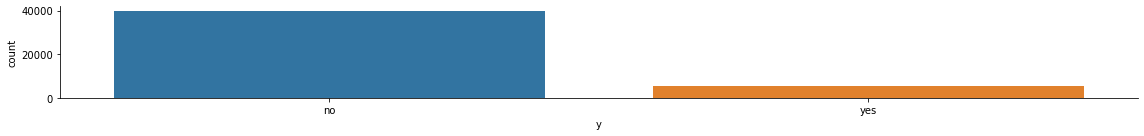

In [10]:
#preprocessing data for EDA
data_train["age_cat"] = pd.cut(data_train["age"], bins= 8, labels=["18 - 27","28 - 37","38 - 46","47 - 56","57 - 66","67 - 75","76 - 85","86 - 95"])
test_ds["age_cat"] = pd.cut(test_ds["age"], bins= 8, labels=["18 - 27","28 - 37","38 - 46","47 - 56","57 - 66","67 - 75","76 - 85","86 - 95"])

data_train["duration_min"] = data_train["duration"]/60
test_ds["duration_min"] = test_ds["duration"]/60

bins = [0, 0.50, 1, 2, 3, 4, 5, 10, 15, 30, 60, 90]
category = ["0 s <30s", "30s-1min","1 min-2min", "2 min-3min", "3 min-4min", "4 min-5min", "5 min-10min", "10 min-15min", "15 min-30min", "30 min-60min", "60 min-90min"]
data_train['duration_cat'] = pd.cut(data_train['duration_min'], bins, labels=category)
print(data_train)

test_ds['duration_cat'] = pd.cut(test_ds['duration_min'], bins, labels=category)
print(test_ds)

bins_1 = [-10000, -5000, -2500,-1000, -500, -100, 0, 100, 250, 500, 1000, 1500, 2500, 5000, 10000, 20000, 50000, 110000]
category_1 = ["-10000 <balance<-5000", "-5000 <balance<-2500","-2500 <balance<-1000","-1000 <balance<-500","-500 <balance<-100", "-100 -0", "0 - 100", "100 - 250", "250 - 500", "500 - 1000", "1000 - 1500", "1500 - 2500", "2500 - 5000", "5000 - 10000", "10000 - 20000", "20000 - 50000", "50000 - 110000"]
data_train['balance_cat'] = pd.cut(data_train['balance'], bins_1, labels=category_1)
print(data_train)
test_ds['balance_cat'] = pd.cut(test_ds['balance'], bins_1, labels=category_1)
print(test_ds)

data_train['day_cat']=data_train['day'].astype(str)
test_ds['day_cat']=test_ds['day'].astype(str)

bins_2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 50, 65]
category_2 = ["1", "2","3","4","5", "6", "7", "8", "9", "10", "10 - 15", "15 - 20", "20 - 25", "25 - 30", "30 - 35", "35 - 40", "40 - 50", "50 - 65"]
data_train['campaign_cat'] = pd.cut(data_train['campaign'], bins_2, labels=category_2)
print(data_train)
test_ds['campaign_cat'] = pd.cut(test_ds['campaign'], bins_2, labels=category_2)
print(test_ds)

bins_3 = [-2,-1, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 650, 880]
category_3 = ["npc", "0 - 50","50 - 100","100 - 150","150 - 200", "200 - 250", "250 - 300", "300 - 350", "350 - 400", "400 - 450", "450 - 500", "500 - 550", "550 - 650", "650 - 880"]
data_train['pdays_cat'] = pd.cut(data_train['pdays'], bins_3, labels=category_3)
print(data_train)
test_ds['pdays_cat'] = pd.cut(test_ds['pdays'], bins_3, labels=category_3)
print(test_ds)

bins_4 = [-1,0,1,2,3,4,5,6,7,8,9,10, 15, 20, 25, 30, 35, 40]
category_4 = ["0","1", "2","3","4","5", "6", "7", "8", "9", "10", "10 - 15", "15 - 20", "20 - 25", "25 - 30", "30 - 35", "35 - 40"]
data_train['previous_cat'] = pd.cut(data_train['previous'], bins_4, labels=category_4)
print(data_train)
test_ds['previous_cat'] = pd.cut(test_ds['previous'], bins_4, labels=category_4)
print(test_ds)
def cat(ds,c):
    """Visualise the transformed categorical columns"""
    for i in c:
        print('Information about', i)
        print(round((ds[i].value_counts(normalize=True) * 100),2))
        sns.catplot(x = i, kind ='count', data = ds, aspect = 8, height = 2, order=ds[i].value_counts().index)
        plt.show()  

cat(ds=data_train, c=['age_cat','job','marital','education','default','balance_cat','housing','loan','contact','day_cat','month','duration_cat','campaign_cat','pdays_cat','previous_cat','poutcome','y'])


Information about age_cat
28 - 37    34.46
38 - 46    24.07
47 - 56    20.73
57 - 66    12.05
18 - 27     6.24
67 - 75     1.26
76 - 85     0.80
86 - 95     0.40
Name: age_cat, dtype: float64


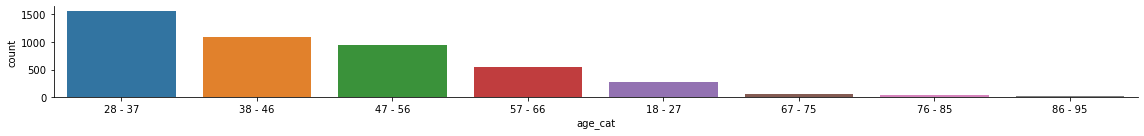

Information about job
management       21.43
blue-collar      20.92
technician       16.99
admin.           10.57
services          9.22
retired           5.09
self-employed     4.05
entrepreneur      3.72
unemployed        2.83
housemaid         2.48
student           1.86
unknown           0.84
Name: job, dtype: float64


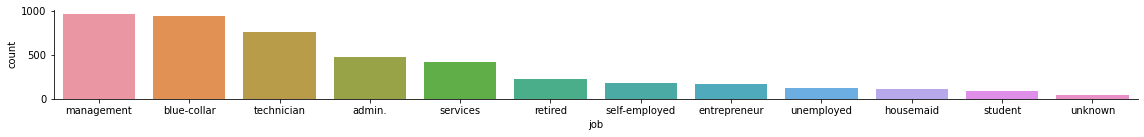

Information about marital
married     61.87
single      26.45
divorced    11.68
Name: marital, dtype: float64


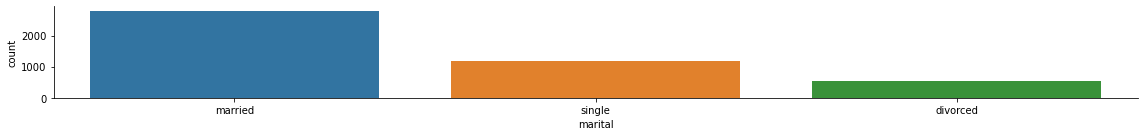

Information about education
secondary    51.01
tertiary     29.86
primary      15.00
unknown       4.14
Name: education, dtype: float64


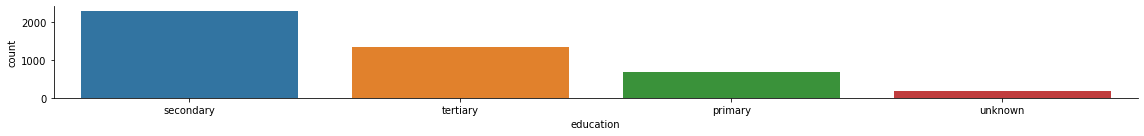

Information about default
no     98.32
yes     1.68
Name: default, dtype: float64


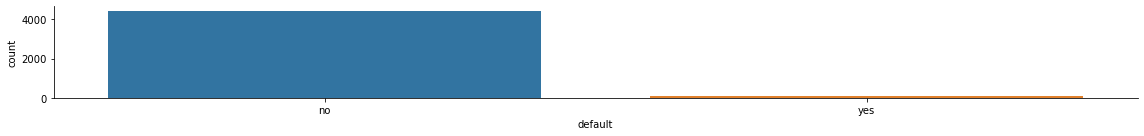

Information about balance_cat
500 - 1000               14.44
250 - 500                13.76
0 - 100                  11.79
100 - 250                11.26
-100 -0                  10.29
2500 - 5000               9.69
1500 - 2500               8.27
1000 - 1500               7.96
5000 - 10000              4.80
-500 <balance<-100        4.03
10000 - 20000             1.59
-1000 <balance<-500       1.37
20000 - 50000             0.42
-2500 <balance<-1000      0.29
50000 - 110000            0.02
-5000 <balance<-2500      0.02
-10000 <balance<-5000     0.00
Name: balance_cat, dtype: float64


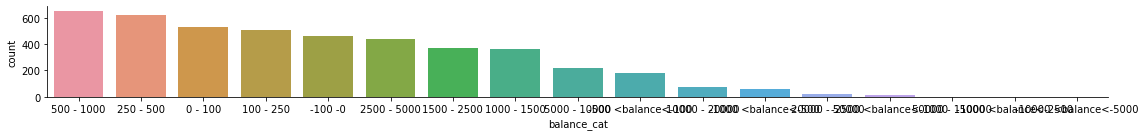

Information about housing
yes    56.6
no     43.4
Name: housing, dtype: float64


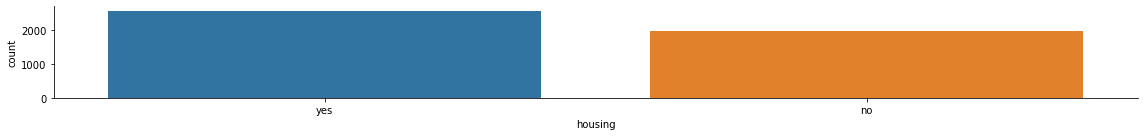

Information about loan
no     84.72
yes    15.28
Name: loan, dtype: float64


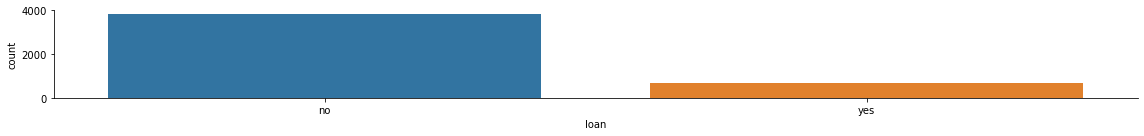

Information about contact
cellular     64.06
unknown      29.29
telephone     6.66
Name: contact, dtype: float64


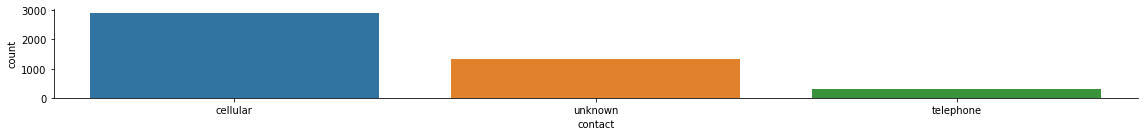

Information about day_cat
20    5.68
18    5.00
19    4.45
21    4.38
14    4.31
17    4.22
7     4.20
6     4.14
28    4.00
5     4.00
8     3.98
29    3.87
15    3.85
30    3.72
13    3.67
16    3.63
9     3.61
11    3.36
12    3.34
4     3.07
2     2.52
27    2.50
26    2.43
3     2.32
23    2.26
22    1.90
25    1.77
31    1.31
10    1.11
24    0.80
1     0.60
Name: day_cat, dtype: float64


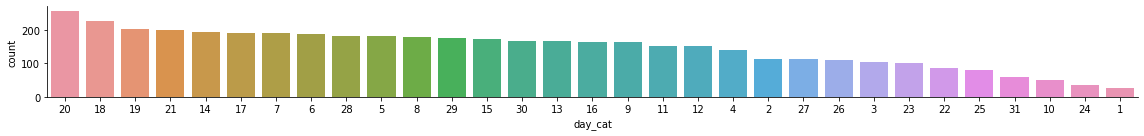

Information about month
may    30.92
jul    15.62
aug    14.00
jun    11.75
nov     8.60
apr     6.48
feb     4.91
jan     3.27
oct     1.77
sep     1.15
mar     1.08
dec     0.44
Name: month, dtype: float64


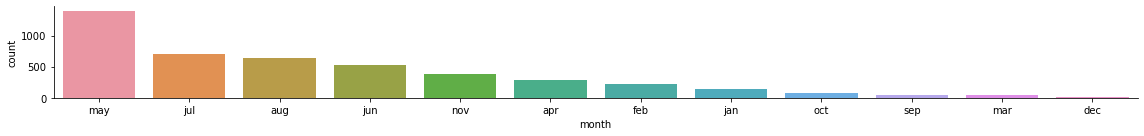

Information about duration_cat
1 min-2min      19.62
5 min-10min     18.60
2 min-3min      18.43
3 min-4min      13.80
4 min-5min       9.33
10 min-15min     6.02
30s-1min         5.91
0 s <30s         4.98
15 min-30min     3.12
30 min-60min     0.20
60 min-90min     0.00
Name: duration_cat, dtype: float64


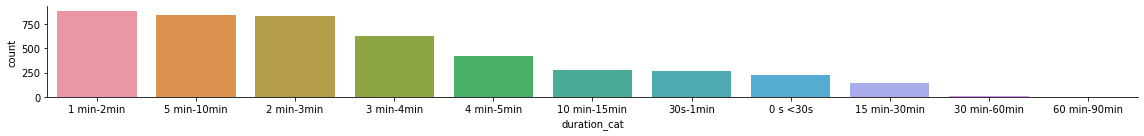

Information about campaign_cat
1          38.35
2          27.96
3          12.34
4           7.19
5           3.69
6           3.43
10 - 15     1.75
7           1.66
8           1.24
9           0.66
15 - 20     0.62
10          0.60
20 - 25     0.29
25 - 30     0.11
30 - 35     0.07
40 - 50     0.04
35 - 40     0.00
50 - 65     0.00
Name: campaign_cat, dtype: float64


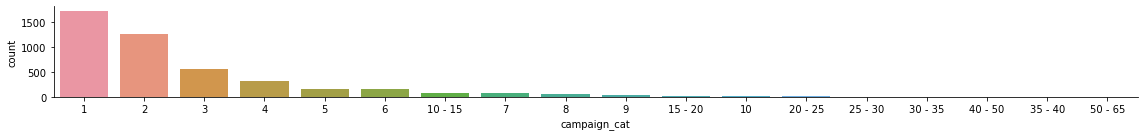

Information about pdays_cat
npc          81.95
150 - 200     4.34
50 - 100      2.65
300 - 350     2.50
350 - 400     2.30
100 - 150     2.26
250 - 300     1.92
200 - 250     1.15
0 - 50        0.35
450 - 500     0.22
400 - 450     0.18
650 - 880     0.15
500 - 550     0.02
550 - 650     0.00
Name: pdays_cat, dtype: float64


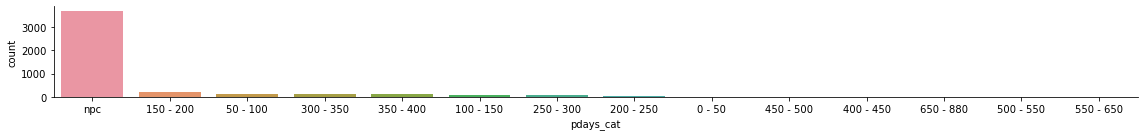

Information about previous_cat
0          81.95
1           6.33
2           4.27
3           2.50
4           1.73
5           1.04
6           0.55
7           0.49
8           0.40
10 - 15     0.27
9           0.22
10          0.09
15 - 20     0.09
20 - 25     0.09
25 - 30     0.00
30 - 35     0.00
35 - 40     0.00
Name: previous_cat, dtype: float64


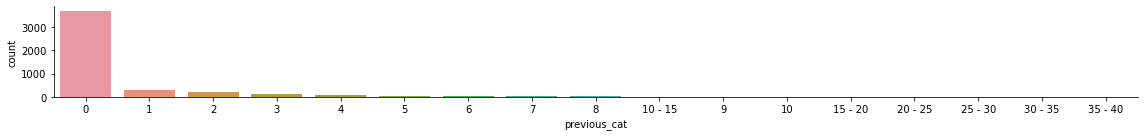

Information about poutcome
unknown    81.95
failure    10.84
other       4.36
success     2.85
Name: poutcome, dtype: float64


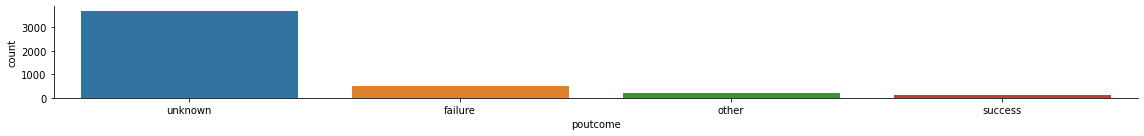

Information about y
no     88.48
yes    11.52
Name: y, dtype: float64


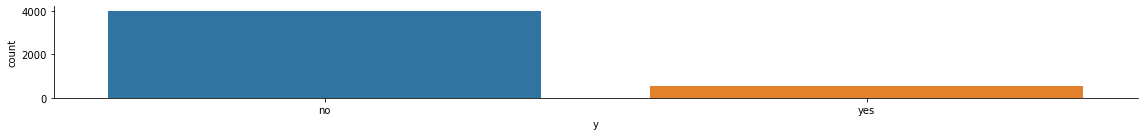

In [11]:
#test
cat(ds=test_ds, c=['age_cat','job','marital','education','default','balance_cat','housing','loan','contact','day_cat','month','duration_cat','campaign_cat','pdays_cat','previous_cat','poutcome','y'])

In [ ]:
#we notice the exitence of unknown data.
#we will treat unknown data:
#unknown values exists in : poutcome, contact, education and job columns
#these unknown values have to be replaced
#job column has 288 rows of unknown:we will ignore them as it is very small compared to our dataset
#poutcome: we will drop this column as most of the data contained is unknown
#Unknown values in Education and Contact will be replaced by mode

Treating Missing Data

In [12]:
#treating missing data
#using new ds
data_data[data_data['job']=='unknown']['education'].value_counts()
ds_test[ds_test['job']=='unknown']['education'].value_counts()
data_off = data_data[data_data['job'] != 'unknown']
ds_test_2 =ds_test[ds_test['job'] != 'unknown']
data_off.drop('poutcome', axis = 1, inplace = True)
ds_test_2.drop('poutcome', axis = 1, inplace = True)
data_off['education'].replace("unknown", data_off['education'].mode()[0], inplace = True)
ds_test_2['education'].replace("unknown", ds_test_2['education'].mode()[0], inplace = True)
data_off['contact'].replace("unknown", data_off['contact'].mode()[0], inplace = True)
ds_test_2['contact'].replace("unknown", ds_test_2['contact'].mode()[0], inplace = True)

C:\Users\blelk\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\blelk\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:>

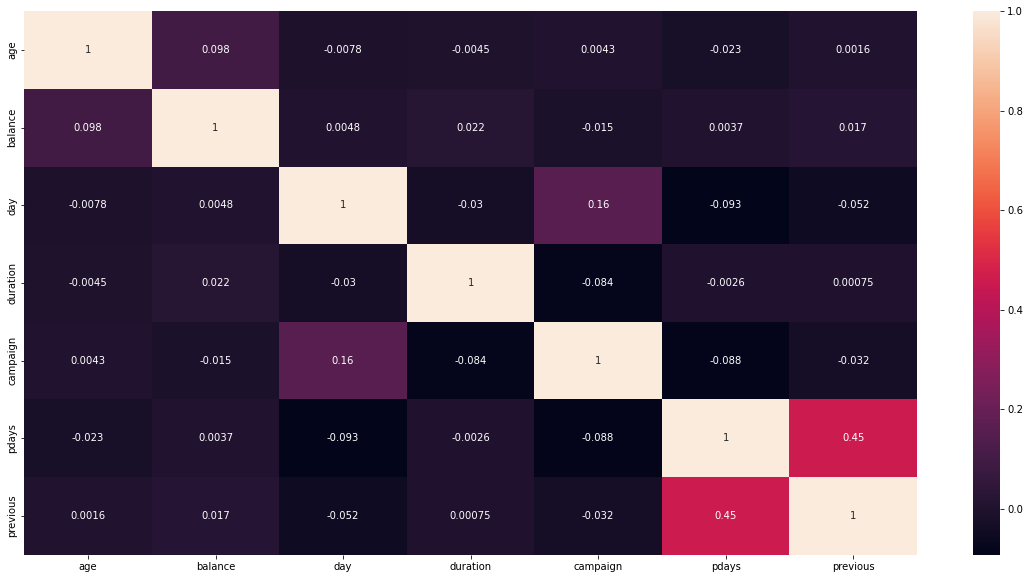

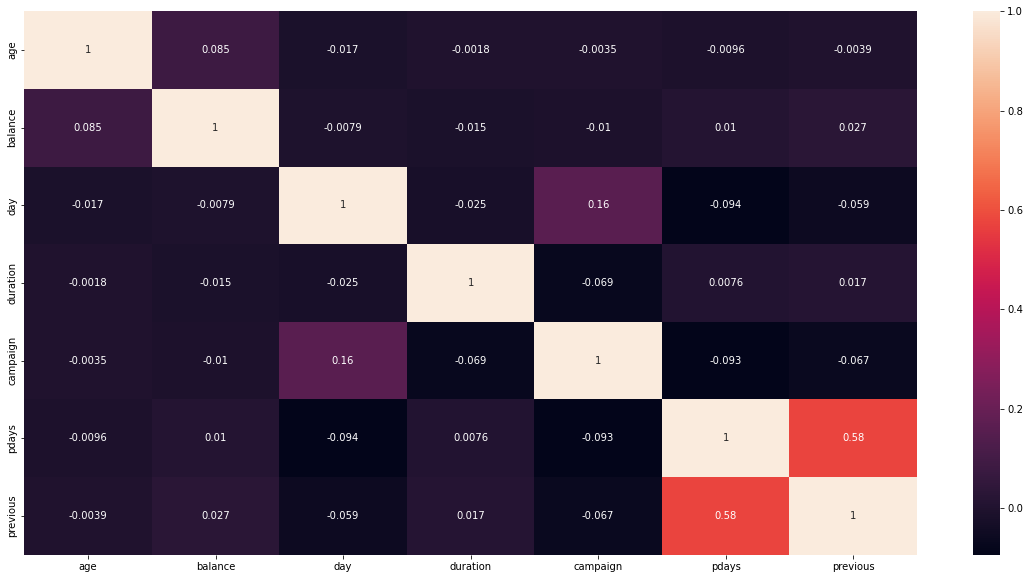

In [13]:
#visulising correlations before encoding
#train
plt.figure(figsize=(20,10))
sns.heatmap(data_off.corr(),annot = True)
#test
plt.figure(figsize=(20,10))
sns.heatmap(ds_test_2.corr(),annot = True)

Data Ecoding

In [14]:
#Data Encoding
pca_df = data_off.copy(deep=True)
test_pca =ds_test_2.copy(deep=True)

#treating binary columns

binary_columns_1 = []
for column in pca_df.select_dtypes('object').columns:
    if len(pca_df[column].unique()) == 2:
        binary_columns_1.append(column)
    
    print(f"Column - {column} ",pca_df[column].unique(), end='\n\n')

binary_columns_1.remove("contact")
print(binary_columns_1)
binary_columns = []
for column in test_pca.select_dtypes('object').columns:
    if len(test_pca[column].unique()) == 2:
        binary_columns.append(column)
    
    print(f"Column - {column} ",test_pca[column].unique(), end='\n\n')

binary_columns.remove("contact")
print(binary_columns)


for column in binary_columns_1:
    pca_df[column] = pca_df[column].map({'yes': 1, 'no': 0})
    
pca_df.loc[:, binary_columns_1]

for column in binary_columns:
    test_pca[column] = test_pca[column].map({'yes': 1, 'no': 0})
    
test_pca.loc[:, binary_columns]

# Create train_x dataframe
pca_data = pca_df.iloc[:, :-1]
 
tes_pca_data = test_pca.iloc[:, :-1]

# Create train_y dataframe
target = pca_df[['y']]
print(target)
target_pca= test_pca[['y']]

# Perform label encoding on education as it is an ordinal data 
education_category = { 
          'primary': 1,
          'secondary': 2,
          'tertiary': 3}
pca_data['education'] = pca_data['education'].replace(education_category)
pca_data['education'].value_counts()

tes_pca_data['education'] = tes_pca_data['education'].replace(education_category)
tes_pca_data['education'].value_counts()

# Get a list of columns for one-hot encoding
ohe_cols = list(pca_data.select_dtypes(include='object').columns.values)
ohe_cols

pca_data_x = pd.get_dummies(pca_data, prefix=ohe_cols, columns=ohe_cols, drop_first=True)
pca_data_x.head()

# Get a list of columns for one-hot encoding for test ds
ohe_cols = list(tes_pca_data.select_dtypes(include='object').columns.values)
ohe_cols

tes_pca_data_x = pd.get_dummies(tes_pca_data, prefix=ohe_cols, columns=ohe_cols, drop_first=True)
tes_pca_data_x.head()

pca_col = pca_data_x
print(pca_col)

#Normalising Data before PCA
from sklearn import preprocessing
normalizer = preprocessing.Normalizer().fit(pca_data_x)  
pca_data_x = normalizer.transform(pca_data_x)
print(pca_data_x)
test_test = normalizer.transform(tes_pca_data_x)
print(test_test)


Column - job  ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']

Column - marital  ['married' 'single' 'divorced']

Column - education  ['tertiary' 'secondary' 'primary']

Column - default  ['no' 'yes']

Column - housing  ['yes' 'no']

Column - loan  ['no' 'yes']

Column - contact  ['cellular' 'telephone']

Column - month  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Column - y  ['no' 'yes']

['default', 'housing', 'loan', 'y']
Column - job  ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired']

Column - marital  ['married' 'single' 'divorced']

Column - education  ['primary' 'secondary' 'tertiary']

Column - default  ['no' 'yes']

Column - housing  ['no' 'yes']

Column - loan  ['no' 'yes']

Column - contact  ['cellular' 'telephone']

Column - month  ['oct' 'may' 'apr' 'jun' 'feb' 'aug

PCA

In [15]:
#PCA
# Loop Function to identify number of principal components that explain at least 85% of the variance
for comp in range(3, test_test.shape[1]):
    pca_0 = PCA(n_components= comp, random_state=42)
    pca_0.fit(test_test)
    comp_check = pca_0.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.85:
        break
        
Final_PCA_test = PCA(n_components= final_comp,random_state=42)
Final_PCA_test.fit(test_test)
cluster_df_1=Final_PCA_test.transform(test_test)
num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))

# train dataset
for comp in range(3, pca_data_x.shape[1]):
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(pca_data_x)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.85:
        break
        
Final_PCA = PCA(n_components= final_comp,random_state=42)
Final_PCA.fit(pca_data_x)
cluster_df=Final_PCA.transform(pca_data_x)
num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))

pca1 = PCA(n_components=3)
principalComponents1 = pca1.fit_transform(pca_data_x)
principalDf1 = pd.DataFrame(data = principalComponents1, columns = ['principal_component_1', 'principal_component_2','principal_component_3'])


pca_1 = PCA(n_components=3)
principalComponents2 = pca_1.fit_transform(test_test)
principalDf2 = pd.DataFrame(data = principalComponents2, columns = ['principal_component_1', 'principal_component_2','principal_component_3'])

principalDf2.index = target_pca.index
principalDf1.index = target.index

#train
final_Df = pd.concat([principalDf1, target], axis = 1)
print(final_Df)
#test
final_Df1 = pd.concat([principalDf2, target_pca], axis = 1)
print(final_Df1)

Using 3 components, we can explain 0.9633788203485492% of the variability in the original data.
Using 3 components, we can explain 0.9646592998179986% of the variability in the original data.
       principal_component_1  principal_component_2  principal_component_3  y
0                  -0.491853               0.079744              -0.064995  0
1                   0.629179              -0.275237              -0.022271  0
2                   0.767102              -0.191847              -0.064057  0
3                  -0.523970               0.127888              -0.077503  0
5                  -0.173871              -0.197578              -0.011410  0
...                      ...                    ...                    ... ..
45206               0.114257              -0.310801               0.022792  1
45207              -0.404932              -0.023739              -0.041225  1
45208              -0.448264               0.032412              -0.019412  1
45209              -0.088043

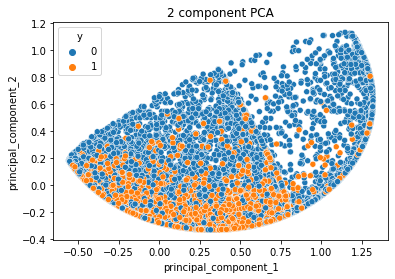

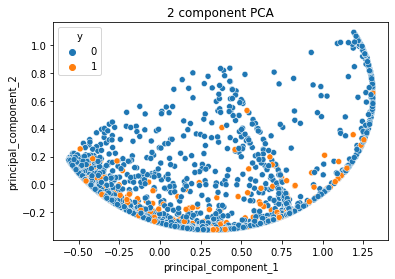

In [16]:
#visualising PCA
#train
sns.scatterplot(data=final_Df, x='principal_component_1', y='principal_component_2', hue='y')
plt.title('2 component PCA')
plt.show()
#test
sns.scatterplot(data=final_Df1, x='principal_component_1', y='principal_component_2', hue='y')
plt.title('2 component PCA')
plt.show()

Text(0, 0.5, 'cumulative explained variance')

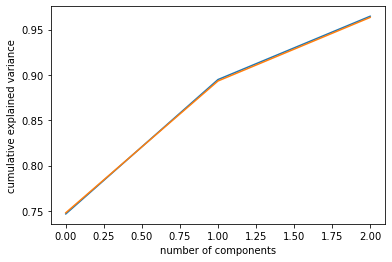

In [17]:
#cumulative explained variance
#train
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')



Text(0, 0.5, 'cumulative explained variance')

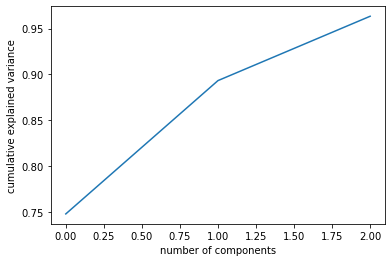

In [18]:
#test
plt.plot(np.cumsum(pca_1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [19]:
#loadings table
#train
loadings = pd.DataFrame(pca1.components_.T, columns=['PC1', 'PC2', 'PC3'], index=pca_col.columns)
print(loadings)
#test
loadings1 = pd.DataFrame(pca_1.components_.T, columns=['PC1', 'PC2', 'PC3'], index=pca_col.columns)
print(loadings1)

                        PC1       PC2       PC3
age                0.100438 -0.084000 -0.060739
education          0.005312 -0.004709 -0.002691
default            0.000172  0.000065 -0.000235
balance           -0.877739 -0.454647  0.136030
housing            0.001377 -0.000591 -0.000103
loan               0.000575 -0.000181 -0.000424
day                0.041919 -0.031322 -0.038766
duration           0.465584 -0.851526  0.212666
campaign           0.008251 -0.000920 -0.015551
pdays              0.029286  0.245211  0.964720
previous           0.000405  0.002554  0.011766
job_blue-collar    0.000570 -0.000258 -0.000349
job_entrepreneur   0.000098 -0.000099 -0.000058
job_housemaid      0.000086 -0.000124 -0.000087
job_management     0.000488 -0.000485 -0.000312
job_retired        0.000086 -0.000103 -0.000109
job_self-employed  0.000073 -0.000105 -0.000036
job_services       0.000281 -0.000184 -0.000140
job_student        0.000030 -0.000072  0.000053
job_technician     0.000440 -0.000390 -0

preparing data for machine learning

In [20]:
#preparing data for machine learning
#training dataset
data_1 = data_data.copy(deep=True)
data_t1 = data_data[data_data['job'] != 'unknown']
data_t1['education'].replace( "unknown", data_t1['education'].mode()[0], inplace=True)
data_t1['contact'].replace("unknown", data_t1['contact'].mode()[0], inplace=True)
data_t1.drop('poutcome', axis=1, inplace=True)
data_t1.drop('day', axis=1, inplace=True)
#test dataset
test_data = data_test.copy(deep=True)
test_data_x= test_data[test_data['job'] != 'unknown']
test_data_x['education'].replace( "unknown", test_data_x['education'].mode()[0], inplace=True)
test_data_x['contact'].replace("unknown", test_data_x['contact'].mode()[0], inplace=True)
test_data_x.drop('poutcome', axis=1, inplace=True)
test_data_x.drop('day', axis=1, inplace=True)

# Create x data
train_x_data = data_t1.iloc[:, :-1]
print(train_x_data)
#test dataset
train_test_x =test_data_x.iloc[:, :-1]
train_test_x

# Create y data
train_y = data_t1[['y']]
train_y.head()
# Create y data
test_y_data = test_data_x[['y']]
test_y_data .head()

education_category = {
          'primary': 1,
          'secondary': 2,
          'tertiary': 3}
train_x_data['education'] = train_x_data['education'].replace(education_category)
train_x_data['education'].value_counts()
train_test_x['education'] = train_test_x['education'].replace(education_category)
train_test_x['education'].value_counts()

# Normalizing the train and test data with TRAINING mean and var.



for column in train_x_data.columns:
    if train_x_data[column].dtype in ['int64', 'float64']:
        
        X = train_x_data[column].array.reshape(-1,1)
        
        # build the scaler model
        scaler = MinMaxScaler()
        
        # fit using the train set
        scaler.fit(X)

        train_x_data[column]=scaler.transform(train_x_data[column].array.reshape(-1, 1)) 
        

train_x_data.describe()

for column in train_test_x.columns:
    if train_test_x[column].dtype in ['int64', 'float64']:
        
        X2 = train_test_x[column].array.reshape(-1,1)
        
        # build the scaler model
        scaler = MinMaxScaler()
        
        # fit using the train set
        scaler.fit(X2)

        train_test_x[column]=scaler.transform(train_test_x[column].array.reshape(-1, 1)) 
        

train_test_x.describe()

#categorical data encoding

# Get a list of columns for one-hot encoding
#train data
ohe_cols = list(train_x_data.select_dtypes(include='object').columns.values)
ohe_cols
train_x_2 = pd.get_dummies(train_x_data, prefix=ohe_cols, columns=ohe_cols, drop_first=True)
train_x_2.head()
#y data
ohe_cols1 = list(train_test_x.select_dtypes(include='object').columns.values)
ohe_cols1
test_x_2 = pd.get_dummies(train_test_x, prefix=ohe_cols1, columns=ohe_cols1, drop_first=True)
test_x_2.head()
# Encode target variable
y_category = {'no': 0,  'yes': 1}
train_y['y'] = train_y['y'].replace(y_category)
train_y['y'].value_counts()
test_y_data['y'] = test_y_data['y'].replace(y_category)
test_y_data['y'].value_counts()

C:\Users\blelk\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\blelk\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married  secondary      no     1506     yes   no   
5       35    management   married   tertiary      no      231     yes   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact month  duration  campaign  pdays  

C:\Users\blelk\AppData\Local\Temp/ipykernel_20468/236654963.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_y['y'] = train_y['y'].replace(y_category)
C:\Users\blelk\AppData\Local\Temp/ipykernel_20468/236654963.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_y_data['y'] = test_y_data['y'].replace(y_category)


0    3969
1     514
Name: y, dtype: int64

Building Machine learning models

In [21]:
#Building Machine Learning models
def eval(model,X_train,y_train,X_test,y_test):
    """Building Machine Learning models and evaluation metrics"""
    print(model)
    
    # Training
    model.fit(train_x_2,train_y)

    # Predicting based in X_test
    y_pred = model.predict(test_x_2)

    # Model Evaluating
        
    tn, fp, fn, tp = confusion_matrix(test_y_data, y_pred).ravel()   

    Accuracy = round(accuracy_score(test_y_data, y_pred),3)

    Precision = round(precision_score(test_y_data, y_pred),3)

    Recall= round(recall_score(test_y_data, y_pred),3)

    F1=  round(f1_score(test_y_data, y_pred),3)    
    
    ROC_AUC=  round(roc_auc_score(test_y_data, y_pred),3)
    
    dict={'TN':tn, 'FP':fp, 'FN':fn, 'TP':tp, 'Ac':Accuracy, 'Pc':Precision, 'Rcll':Recall, 'F1':F1, 'roc_auc':ROC_AUC}
           
    return(dict)

In [22]:
#evaluating models
print("Decision Tree :",eval(DecisionTreeClassifier(),train_x_2,train_y,test_x_2,test_y_data))
print("Random Forest :",eval(RandomForestClassifier(),train_x_2,train_y,test_x_2,test_y_data))
print("Gradient Boosting :",eval(GradientBoostingClassifier(),train_x_2,train_y,test_x_2,test_y_data))

DecisionTreeClassifier()
Decision Tree : {'TN': 3243, 'FP': 726, 'FN': 219, 'TP': 295, 'Ac': 0.789, 'Pc': 0.289, 'Rcll': 0.574, 'F1': 0.384, 'roc_auc': 0.696}
RandomForestClassifier()


C:\Users\blelk\AppData\Local\Temp/ipykernel_20468/2940407726.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x_2,train_y)


Random Forest : {'TN': 3723, 'FP': 246, 'FN': 209, 'TP': 305, 'Ac': 0.899, 'Pc': 0.554, 'Rcll': 0.593, 'F1': 0.573, 'roc_auc': 0.766}
GradientBoostingClassifier()


C:\Users\blelk\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting : {'TN': 3623, 'FP': 346, 'FN': 205, 'TP': 309, 'Ac': 0.877, 'Pc': 0.472, 'Rcll': 0.601, 'F1': 0.529, 'roc_auc': 0.757}


In [ ]:
# Gradient Boosting appears to be the best performing based on recall

Balancing data with SMOTE

In [23]:
#Balancing Data SMOTE
X_train_resampled_1, y_train_resampled_1 = SMOTE().fit_resample(train_x_2[['age', 'education', 'balance', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep']],train_y["y"])
y_train_resampled_1.value_counts()

0    39668
1    39668
Name: y, dtype: int64

Evaluating Models after SMOTE

In [24]:
#Evaluating models after SMOTE
def eval1(model,X_train,y_train,X_test,y_test):

    """Building Machine Learning models and evaluation metrics"""
    
    print(model)
    
    # Training
    model.fit(X_train_resampled_1,y_train_resampled_1)

    # Predicting based in X_test
    y_pred = model.predict(test_x_2)

    # Model Evaluating
        
    tn, fp, fn, tp = confusion_matrix(test_y_data, y_pred).ravel()   

    Accuracy = round(accuracy_score(test_y_data, y_pred),3)

    Precision = round(precision_score(test_y_data, y_pred),3)

    Recall= round(recall_score(test_y_data, y_pred),3)

    F1=  round(f1_score(test_y_data, y_pred),3)    
    
    ROC_AUC=  round(roc_auc_score(test_y_data, y_pred),3)
    
    dict={'TN':tn, 'FP':fp, 'FN':fn, 'TP':tp, 'Ac':Accuracy, 'Pc':Precision, 'Rcll':Recall, 'F1':F1, 'roc_auc':ROC_AUC}
           
    return(dict)

In [25]:
#evaluating models after SMOTE
print("Decision Tree :",eval1(DecisionTreeClassifier(),train_x_2,train_y,test_x_2,test_y_data))
print("Random Forest :",eval1(RandomForestClassifier(),train_x_2,train_y,test_x_2,test_y_data))
print("Gradient Boosting :",eval1(GradientBoostingClassifier(),train_x_2,train_y,test_x_2,test_y_data))

DecisionTreeClassifier()
Decision Tree : {'TN': 2823, 'FP': 1146, 'FN': 159, 'TP': 355, 'Ac': 0.709, 'Pc': 0.237, 'Rcll': 0.691, 'F1': 0.352, 'roc_auc': 0.701}
RandomForestClassifier()
Random Forest : {'TN': 3389, 'FP': 580, 'FN': 137, 'TP': 377, 'Ac': 0.84, 'Pc': 0.394, 'Rcll': 0.733, 'F1': 0.513, 'roc_auc': 0.794}
GradientBoostingClassifier()
Gradient Boosting : {'TN': 2551, 'FP': 1418, 'FN': 48, 'TP': 466, 'Ac': 0.673, 'Pc': 0.247, 'Rcll': 0.907, 'F1': 0.389, 'roc_auc': 0.775}


In [ ]:
#Effect of SMOTE:
#Rise in False Positives and True Positives.
#Decline in False Negatives and True Negatives.
# => increased recall in all models
# Gradient Boosting appears to be the best model based on recall

Cross validation after SMOTE

In [26]:
#cross validation after SMOTE
scores = cross_validate(DecisionTreeClassifier(),  X_train_resampled_1, y_train_resampled_1, cv=10,scoring='accuracy',return_train_score=True)
print(scores)
#overfitting

{'fit_time': array([0.75538015, 0.72000647, 0.76075482, 0.77588916, 0.75440955,
       0.77354312, 0.75209713, 0.7332654 , 0.72296596, 0.76873136]), 'score_time': array([0.00276685, 0.00482845, 0.00570631, 0.00433731, 0.00538325,
       0.00527287, 0.00812125, 0.00617862, 0.00534511, 0.00764608]), 'test_score': array([0.73720696, 0.86891858, 0.82480464, 0.88013612, 0.91958659,
       0.92261155, 0.85604437, 0.7882264 , 0.90155049, 0.735283  ]), 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}


In [27]:
scores = cross_validate(RandomForestClassifier(),  X_train_resampled_1, y_train_resampled_1, cv=10,scoring='accuracy',return_train_score=True)
print(scores)
#overfitting

{'fit_time': array([12.47451067, 13.16117024, 11.43967724, 11.47920704, 11.56740212,
       11.19238067, 13.64524055, 10.274019  , 10.17101598, 10.15735888]), 'score_time': array([0.17892313, 0.21306324, 0.23219323, 0.23205566, 0.22119212,
       0.19045043, 0.26169181, 0.20886421, 0.2788837 , 0.18263674]), 'test_score': array([0.84333249, 0.93836652, 0.86601966, 0.91908243, 0.94630703,
       0.95512982, 0.88705408, 0.81898399, 0.92373629, 0.74347662]), 'train_score': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.99997199, 1.        ])}


In [28]:
scores = cross_validate(GradientBoostingClassifier(),  X_train_resampled_1, y_train_resampled_1, cv=10,scoring='accuracy',return_train_score=True)
print(scores)
#not overfitting

{'fit_time': array([17.30878425, 17.46809292, 17.33375978, 19.7269628 , 28.12457514,
       24.43728614, 20.35218668, 19.55718184, 19.15249085, 23.90324187]), 'score_time': array([0.01559615, 0.01736975, 0.01778865, 0.07261992, 0.03960156,
       0.02708197, 0.04716849, 0.02715445, 0.01634765, 0.04562068]), 'test_score': array([0.77476683, 0.89614318, 0.86072599, 0.90143685, 0.92513234,
       0.92765314, 0.8622211 , 0.80347914, 0.91907223, 0.75230052]), 'train_score': array([0.91718719, 0.90497465, 0.90343408, 0.90232767, 0.90010084,
       0.89935856, 0.90552218, 0.90884137, 0.90034032, 0.916208  ])}


Hyper-parameter Tuning for Decision Tree

In [29]:
#Hyper-parameter Tuning for Decision Tree
param_grid = {
    'splitter': ["best", "random"],
    'max_depth': [10, 15, 20, 30, 39],
    'min_samples_leaf': [5, 10, 15, 20, 35, 40],
    'criterion': ["gini", "entropy"],
    'max_features':["log2", "sqrt"]
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier() , param_grid=param_grid, n_jobs=-1, verbose = 3, cv = 5, scoring="recall")
grid_search.fit(X_train_resampled_1, y_train_resampled_1)
print(grid_search.best_estimator_)
print(grid_search.best_estimator_.get_params())
#result: DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt', min_samples_leaf=5)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       min_samples_leaf=5)
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


Evaluating results

In [32]:
#Evaluating results of HP Tuning 
DTC = DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt', min_samples_leaf=5)
eval(DTC,X_train_resampled_1, y_train_resampled_1,test_x_2,test_y_data)

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       min_samples_leaf=5)


{'TN': 3543,
 'FP': 426,
 'FN': 260,
 'TP': 254,
 'Ac': 0.847,
 'Pc': 0.374,
 'Rcll': 0.494,
 'F1': 0.425,
 'roc_auc': 0.693}

In [35]:
#proof that model is not overfitting after HP tuning
scores = cross_validate(DTC,  X_train_resampled_1, y_train_resampled_1, cv=10,scoring='accuracy',return_train_score=True)
print(scores)

{'fit_time': array([0.53300071, 0.34029412, 0.25205231, 0.25615263, 0.30074883,
       0.26252604, 0.24390316, 0.27620459, 0.31040478, 0.3103056 ]), 'score_time': array([0.01196694, 0.00888824, 0.00997567, 0.00794673, 0.0100019 ,
       0.00697803, 0.00852442, 0.00797272, 0.00892925, 0.00997877]), 'test_score': array([0.7534661 , 0.84522309, 0.79947063, 0.82732543, 0.87950592,
       0.89412654, 0.77864616, 0.74877096, 0.85276692, 0.71813942]), 'train_score': array([0.90158539, 0.84914988, 0.90196353, 0.8795692 , 0.89350438,
       0.90330803, 0.89459827, 0.89958405, 0.88816996, 0.90448581])}


In [ ]:
#Hp Tuning for Decision Tree solved overfitting 

In [34]:
#comparing with Gradient booster
eval(GradientBoostingClassifier(),X_train_resampled_1, y_train_resampled_1,test_x_2,test_y_data)

GradientBoostingClassifier()


C:\Users\blelk\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'TN': 3623,
 'FP': 346,
 'FN': 205,
 'TP': 309,
 'Ac': 0.877,
 'Pc': 0.472,
 'Rcll': 0.601,
 'F1': 0.529,
 'roc_auc': 0.757}

In [ ]:
#Gradient Boosting seems to be the best performer